# Build an agent with tool-calling superpowers 🦸 using smolagents
_Authored by: [Aymeric Roucher](https://huggingface.co/m-ric)_

This notebook demonstrates how you can use [**smolagents**](https://huggingface.co/docs/smolagents/index) to build awesome **agents**!

What are **agents**? Agents are systems that are powered by an LLM and enable the LLM (with careful prompting and output parsing) to use specific *tools* to solve problems.

These *tools* are basically functions that the LLM couldn't perform well by itself: for instance for a text-generation LLM like [Llama-3-70B](https://huggingface.co/meta-llama/Meta-Llama-3-70B-Instruct), this could be an image generation tool, a web search tool, a calculator...

What is **smolagents**? It's an library that provides building blocks to build your own agents! Learn more about it in the [documentation](https://huggingface.co/docs/smolagents/index).

Let's see how to use it, and which use cases it can solve.

Run the line below to install required dependencies:

In [1]:
!pip install smolagents datasets langchain sentence-transformers faiss-cpu duckduckgo-search openai langchain-community --upgrade -q

Let's login in order to call the HF Inference API:

In [2]:
from huggingface_hub import notebook_login

notebook_login()

## 1. 🏞️ Multimodal + 🌐 Web-browsing assistant

For this use case, we want to show an agent that browses the web and is able to generate images.

To build it, we simply need to have two tools ready: image generation and web search.
- For image generation, we load a tool from the Hub that uses the HF Inference API (Serverless) to generate images using Stable Diffusion.
- For the web search, we use a built-in tool.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate me a photo of the car that James bond drove in the latest movie.                                       │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-72B-Instruct ────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  query = "latest James Bond movie and the car he drove"                                                           
  results = web_search(query=query)                                                                                
  print(results)                                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[These are All the Cars in the New James Bond Movie 'No ... - 
GTPlanet](https://www.gtplanet.net/these-are-all-the-cars-in-the-new-james-bond-movie-no-time-to-die/)
We get a quick glimpse of James pulling the cover off a black V8 Vantage, and driving it into London's city 
streets. That's a nod back to the car Timothy Dalton's Bond drove in The Living Daylights, one of very few things 
beloved of that era of Bond. It's also possibly the least realistic bit of the trailer, as Bond parks it up right 
...

[Here's Every Car James Bond Drives In No Time To Die (Plus 2 He 
Dodges)](https://www.hotcars.com/heres-every-car-james-bond-drives-in-no-time-to-die-plus-2-he-dodges/)
Thanks to partnerships with Aston Martin, Land Rover, and Triumph, this movie is full of incredible vehicles. Read 
on to find out every car James bond drives, and two villain-driven vehicles he has to dodge. The 25th 007 film is 
shaping up to be the best Bond movie yet for car fans. Maserati Quattroporte IV

[Every Car James Bond Drives in 'No Time To Die' - 
MotorBiscuit.com](https://www.motorbiscuit.com/every-car-james-bond-drives-no-time-to-die/)
James Bond: Agent 007. He loves action, he loves gadgets, and he loves classic cars. The upcoming film features 
James Bond behind the wheel of a myriad of breathtaking classic cars-including two Aston Martins. The BMW-powered 
DB5 stunt car may be the most unique custom car in a film since the new batmobile.

[Pierce Brosnan's Latest Photo Fuels James Bond Return 
Hype](https://www.mensjournal.com/entertainment/pierce-brosnan-james-bond-photo-aston-martin)
Over on the Aston Martin Instagram, the famous car manufacturer posted a reunion between Brosnan and one of his 
James Bond costars; the 2002 Aston Martin V12 Vanquish, which Brosnan drove in his ...

[All of the Bond cars of 'No Time To Die' (caution for spoilers) - 
Autoblog](https://www.autoblog.com/features/no-time-to-die-james-bond-cars)
In short, though, the cars of Daniel Craig's last Bond film don't disappoint, and neither do the stunts. There is 
plenty for car enthusiasts to ogle at when No Time To Die opens in theaters on ...

[Daniel Craig's Stunt Driver on the Best Bond Cars in 'No Time to 
Die'](https://robbreport.com/motors/cars/daniel-craig-stunt-driver-aston-martin-chief-designer-preview-cars-no-time
-to-die-movie-2910120/)
We also were given a view of the V8 Vantage that Bond drives in the latest movie. One of the first British muscle 
cars, the 5.3-litre V-8 is also a perfect fit for Bond's macho image.

[Everything you need to know about the next James Bond 
film](https://supercarblondie.com/new-james-bond-daniel-craig-aaron-taylor-johnson-aston-martin/)
In addition to the iconic 1965 Aston Martin DB5, the movie included two modern-day supercars, the DBS Superleggera 
and the Valhalla. In the film, Craig also drove the iconic V8 Vantage from the 1980s. We can expect the next James 
Bond film to include the DBX, Aston's first SUV, and possibly the Valkyrie hypercar. Aston Martin The Gadgets

[The Real Story Behind James Bond's 'New' 1980s Aston Martin V8 In 'No 
...](https://www.motorbiscuit.com/the-real-story-behind-james-bonds-new-1980s-aston-martin-v8-in-no-time-to-die/)
In the final Daniel Craig James Bond movie No Time To Die, Agent 007 drives some beautiful classic vehicles. He 
uses a mini-gun-equipped Aston Martin DB5 in a chase. He cruises around Jamaica in a vintage Land Rover.But one car
is a touching homage to 1987's The Living Daylights: A 1987 Aston Martin V8 Vantage Volante.Learn the real story 
behind James Bond's 'New' 1980s Aston Martin V8.

[New James Bond Movie Is the Ultimate Test Drive for the Range Rover 
...](https://www.autoevolution.com/news/new-james-bond-movie-is-the-ultimate-test-drive-for-the-range-rover-sport-s
vr-169292.html)
New behind-the-scenes footage of the latest James Bond movie in the franchise shows the Range Rover Sport SVR being
put through the ultimate test drive,

[Step 1: Duration 4.12 seconds| Input tokens: 2,165 | Output tokens: 62]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  query = "James Bond Aston Martin V8 Vantage in No Time To Die"                                                   
  results = web_search(query=query)                                                                                
  print(results)                                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[The Real Story Behind James Bond's 'New' 1980s Aston Martin V8 In 'No 
...](https://www.motorbiscuit.com/the-real-story-behind-james-bonds-new-1980s-aston-martin-v8-in-no-time-to-die/)
In the final Daniel Craig James Bond movie No Time To Die, Agent 007 drives some beautiful classic vehicles. He 
uses a mini-gun-equipped Aston Martin DB5 in a chase. He cruises around Jamaica in a vintage Land Rover.But one car
is a touching homage to 1987's The Living Daylights: A 1987 Aston Martin V8 Vantage Volante.Learn the real story 
behind James Bond's 'New' 1980s Aston Martin V8.

[No Time To Die: Why Madeleine Had Bond's Car At The End (& What It 
Means)](https://screenrant.com/no-time-die-madeleine-aston-martin-why/)
Warning: SPOILERS for No Time To Die. At the end of No Time To Die, Dr. Madeleine Swann (Léa Seydoux) is driving 
James Bond's (Daniel Craig) Aston Martin V8 Vantage, and here's why she now owns 007's classic car.In a turn of 
events even fans wouldn't have seen coming, Bond sacrificed his life for Madeleine and their young daughter 
Mathilde (Lisa Dorah-Sonnet), in No Time To Die's explosive ...

[The Bond Collection: "No Time To Die" Aston Martins you ... - 
JamesEdition](https://www.jamesedition.com/stories/cars/the-bond-collection-no-time-to-die-aston-martins-you-can-bu
y-right-now/)
With the perfect blend of classic and new Aston Martins featured in the film, "No Time To Die" is not just the 
latest James Bond movie, but also a specific "love letter" between a cultural and automotive icon. In the long 
awaited 007 sequel, Aston Martin played a significant role with four rare models.

[Here's What Happened To James Bond's Aston Martin V8 Vantage ... - 
HotCars](https://www.hotcars.com/heres-what-happened-to-james-bonds-aston-martin-v8-vantage-volante/)
Timothy Dalton's fast, cool, and well-equipped Aston Martin V8 from The Living Daylights is easily one of the best 
Bond cars ever. The vehicle is even rumored to return to the big screen in No Time To Die. Today, we look back at 
007's Aston Martin V8 and find out where it is now. Bond's Back In An Aston Martin

[All of the Bond cars of 'No Time To Die' (caution for spoilers) - 
Autoblog](https://www.autoblog.com/features/no-time-to-die-james-bond-cars)
Aston Martin V8 Vantage: Boy were we happy to see the original V8 Vantage from the late 1970s and 1980s make an 
appearance. In fact, it made multiple appearances throughout the film. In fact, it ...

[Aston Martin V8 - Bond Lifestyle](https://www.jamesbondlifestyle.com/product/aston-martin-v8)
The Aston Martin V8 is featured in The Living Daylights (1987) and once again in No Time To Die (2021).. The Living
Daylights. James Bond drives the Aston Martin V8 in The Living Daylights and the car features several gadgets.. 
Bond actually drives two Aston Martins in this film, though they are supposed to be the same car.

[Every 'No Time To Die' Aston Martin Driven And Reviewed - 
Esquire](https://www.esquire.com/uk/design/a31003673/no-time-to-die-aston-martin-james-bond/)
Thirty three years on from its first and last appearance as Timothy Dalton's ride in The Living Daylights, in No 
Time To Die the V8 Vantage will most likely appear when James Bond picks it up ...

[No Time To Die: Every Bond Vehicle And Gadget Explained - Screen 
Rant](https://screenrant.com/no-time-to-die-bond-every-gadget-vehicle-explained/)
Like the DB5, No Time To Die will include another classic Bond vehicle from the previous continuity, this time the 
Aston Martin V8 Vantage, as seen in 1987's The Living Daylights from the Timothy Dalton era. In its debut, the V8 
Vantage included even more advanced weaponry than the DB5, with forward-firing missiles, cutting laser beams, and 
an emergency self-destruct system.

[No Time To Die Aston Martin V8 Garage Outfit | Bond 
Lifestyle](https://www.jamesbondlifestyle.com/tags/no-time-die-aston-martin-v8-garage-outfit)
James Bond (Daniel Craig) wears a Rogue Territory Waxed Ri

[Step 2: Duration 6.10 seconds| Input tokens: 5,675 | Output tokens: 161]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  car_prompt = "James Bond's Aston Martin V8 Vantage in No Time To Die, high-res, photorealistic"                  
  image = image_generator(prompt=car_prompt)                                                                       
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x78A15EA85810>

[Step 3: Duration 8.12 seconds| Input tokens: 10,580 | Output tokens: 256]

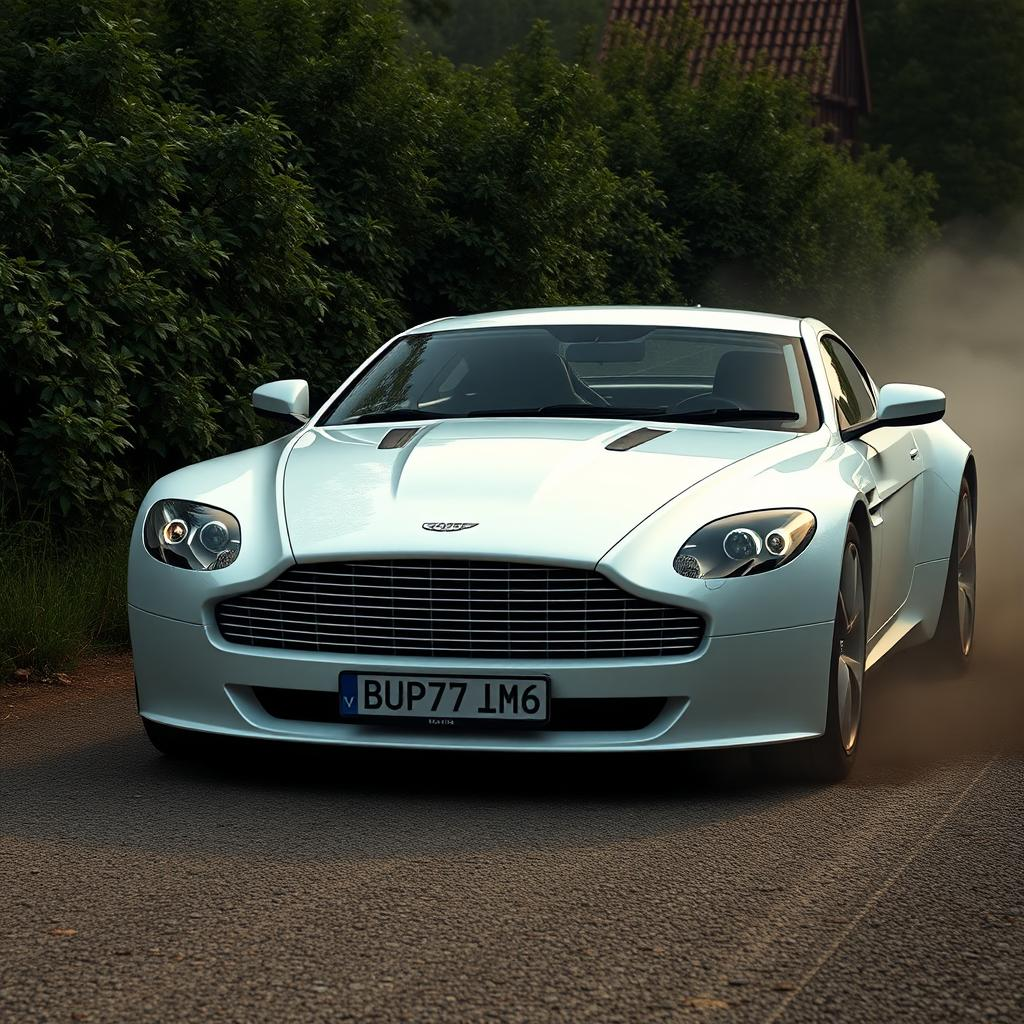

In [3]:
from smolagents import load_tool, CodeAgent, HfApiModel, DuckDuckGoSearchTool

# Import tool from Hub
image_generation_tool = load_tool("m-ric/text-to-image", trust_remote_code=True)


search_tool = DuckDuckGoSearchTool()

model = HfApiModel("Qwen/Qwen2.5-72B-Instruct")
# Initialize the agent with both tools
agent = CodeAgent(
    tools=[image_generation_tool, search_tool], model=model
)

# Run it!
result = agent.run(
    "Generate me a photo of the car that James bond drove in the latest movie.",
)
result

![Image of an Aston Martin DB5](https://huggingface.co/datasets/huggingface/cookbook-images/resolve/main/agents_db5.png)

## 2. 📚💬 RAG with Iterative query refinement & Source selection





Quick definition: Retrieval-Augmented-Generation (RAG) is ___“using an LLM to answer a user query, but basing the answer on information retrieved from a knowledge base”.___

This method has many advantages over using a vanilla or fine-tuned LLM: to name a few, it allows to ground the answer on true facts and reduce confabulations, it allows to provide the LLM with domain-specific knowledge, and it allows fine-grained control of access to information from the knowledge base.

- Now let’s say we want to perform RAG, but with the additional constraint that some parameters must be dynamically generated. For example, depending on the user query we could want to restrict the search to specific subsets of the knowledge base, or we could want to adjust the number of documents retrieved. The difficulty is: **how to dynamically adjust these parameters based on the user query?**

- A frequent failure case of RAG is when the retrieval based on the user query does not return any relevant supporting documents. **Is there a way to iterate by re-calling the retriever with a modified query in case the previous results were not relevant?**


🔧 Well, we can solve the points above in a simple way: we will **give our agent control over the retriever's parameters!**

➡️ Let's show how to do this. We first load a knowledge base on which we want to perform RAG: this dataset is a compilation of the documentation pages for many `huggingface` packages, stored as markdown.


In [4]:
import datasets

knowledge_base = datasets.load_dataset("m-ric/huggingface_doc", split="train")

README.md:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

huggingface_doc.csv:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2647 [00:00<?, ? examples/s]

Now we prepare the knowledge base by processing the dataset and storing it into a vector database to be used by the retriever. We are going to use LangChain, since it features excellent utilities for vector databases:


In [5]:
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings

source_docs = [
    Document(page_content=doc["text"], metadata={"source": doc["source"].split("/")[1]})
    for doc in knowledge_base
]

docs_processed = RecursiveCharacterTextSplitter(chunk_size=500).split_documents(
    source_docs
)[:1000]

embedding_model = HuggingFaceEmbeddings(model_name="thenlper/gte-small")
vectordb = FAISS.from_documents(documents=docs_processed, embedding=embedding_model)

<ipython-input-5-b8636c30f857>:15: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="thenlper/gte-small")


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Now that we have the database ready, let’s build a RAG system that answers user queries based on it!

We want our system to select only from the most relevant sources of information, depending on the query.

Our documentation pages come from the following sources:

In [6]:
all_sources = list(set([doc.metadata["source"] for doc in docs_processed]))
print(all_sources)

['evaluate', 'datasets-server', 'gradio', 'hf-endpoints-documentation', 'pytorch-image-models', 'deep-rl-class', 'diffusers', 'course', 'transformers', 'blog', 'datasets', 'hub-docs', 'optimum', 'peft']


👉 Now let's build a `RetrieverTool` that our agent can leverage to retrieve information from the knowledge base.

Since we need to add a vectordb as an attribute of the tool, we cannot simply use the [simple tool constructor](https://huggingface.co/docs/transformers/main/en/agents#create-a-new-tool) with a `@tool` decorator: so we will follow the advanced setup highlighted in the [advanced agents documentation](https://huggingface.co/docs/transformers/main/en/agents_advanced#directly-define-a-tool-by-subclassing-tool-and-share-it-to-the-hub).

In [13]:
import json
from smolagents import Tool
from langchain_core.vectorstores import VectorStore


class RetrieverTool(Tool):
    name = "retriever"
    description = "Retrieves some documents from the knowledge base that have the closest embeddings to the input query."
    inputs = {
        "query": {
            "type": "string",
            "description": "The query to perform. This should be semantically close to your target documents. Use the affirmative form rather than a question.",
        },
        "source": {"type": "string", "description": ""},
        "number_of_documents": {
            "type": "string",
            "description": "the number of documents to retrieve. Stay under 10 to avoid drowning in docs",
            "nullable": True

        },
    }
    output_type = "string"

    def __init__(self, vectordb: VectorStore, all_sources: str, **kwargs):
        super().__init__(**kwargs)
        self.vectordb = vectordb
        self.inputs["source"]["description"] = (
            f"The source of the documents to search, as a str representation of a list. Possible values in the list are: {all_sources}. If this argument is not provided, all sources will be searched.".replace(
                "'", "`"
            )
        )

    def forward(self, query: str, source: str = None, number_of_documents=7) -> str:
        assert isinstance(query, str), "Your search query must be a string"
        number_of_documents = int(number_of_documents)

        if source:
            if isinstance(source, str) and "[" not in str(
                source
            ):  # if the source is not representing a list
                source = [source]
            source = json.loads(str(source).replace("'", '"'))

        docs = self.vectordb.similarity_search(
            query,
            filter=({"source": source} if source else None),
            k=number_of_documents,
        )

        if len(docs) == 0:
            return "No documents found with this filtering. Try removing the source filter."
        return "Retrieved documents:\n\n" + "\n===Document===\n".join(
            [doc.page_content for doc in docs]
        )

### Optional: Share your Retriever tool to Hub

To share your tool to the Hub, first copy-paste the code in the RetrieverTool definition cell to a new file named for instance `retriever.py`.

When the tool is loaded from a separate file, you can then push it to the Hub using the code below (make sure to login with a `write` access token)

In [8]:
share_to_hub = True

if share_to_hub:
    from huggingface_hub import login
    from retriever import RetrieverTool

    login("your_token")

    tool = RetrieverTool(vectordb, all_sources)

    tool.push_to_hub(repo_id="m-ric/retriever-tool")

    # Loading the tool
    from smolagents import load_tool

    retriever_tool = load_tool(
        "m-ric/retriever-tool", vectordb=vectordb, all_sources=all_sources
    )

ModuleNotFoundError: No module named 'retriever'

### Run the agent!

In [14]:
from smolagents import HfApiModel, ToolCallingAgent

model = HfApiModel("Qwen/Qwen2.5-72B-Instruct")

retriever_tool = RetrieverTool(vectordb=vectordb, all_sources=all_sources)
agent = ToolCallingAgent(tools=[retriever_tool], model=model, verbose=0)

agent_output = agent.run("Please show me a LORA finetuning script")

print("Final output:")
print(agent_output)

AssertionError: Nullable argument 'number_of_documents' in function signature should have key 'nullable' set to True in inputs.

What happened here? First, the agent launched the retriever with specific sources in mind (`['transformers', 'blog']`).

But this retrieval did not yield enough results ⇒ no problem! The agent could iterate on previous results, so it just re-ran its retrieval with less restrictive search parameters.
Thus the research was successful!

Note that **using an LLM agent** that calls a retriever as a tool and can dynamically modify the query and other retrieval parameters **is a more general formulation of RAG**, which also covers many RAG improvement techniques like iterative query refinement.

## 3. 💻 Debug Python code
Since the CodeAgent has a built-in Python code interpreter, we can use it to debug our faulty Python script!

In [ ]:
from smolagents import CodeAgent

agent = CodeAgent(tools=[], model=HfApiModel("Qwen/Qwen2.5-72B-Instruct"))

code = """
numbers=[0, 1, 2]

for i in range(4):
    print(numbers(i))
"""

final_answer = agent.run(
    "I have some code that creates a bug: please debug it, then run it to make sure it works and return the final code",
    additional_args=dict(code=code)
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ I have some code that creates a bug: please debug it, then run it to make sure it works and return the final    │
│ code                                                                                                            │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'code': '\nnumbers=[0, 1, 2]\n\nfor i in range(4):\n    print(numbers(i))\n'}.                                 │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-72B-Instruct ────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 numbers=[0, 1, 2]                                                                                           │
│   2                                                                                                             │
│   3 for i in range(4):                                                                                          │
│   4     print(numbers[i])                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Code execution failed: 0
1
2
Code execution failed at line 'for i in range(4):
    print(numbers)' because of the following error:
Index 3 out of bounds for list of length 3

[Step 0: Duration 16.39 seconds| Input tokens: 2,059 | Output tokens: 100]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 numbers=[0, 1, 2]                                                                                           │
│   2                                                                                                             │
│   3 for i in range(len(numbers)):                                                                               │
│   4     print(numbers[i])                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Execution logs:
0
1
2

Out: None

[Step 1: Duration 17.45 seconds| Input tokens: 4,370 | Output tokens: 210]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 fixed_code = '''                                                                                            │
│   2 numbers=[0, 1, 2]                                                                                           │
│   3                                                                                                             │
│   4 for i in range(len(numbers)):                                                                               │
│   5     print(numbers[i])                                                                                       │
│   6 '''                                                                                                         │
│   7                                                                                                             │
│   8 final_answer(fixed_code)                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: 
numbers=[0, 1, 2]

for i in range(len(numbers)):
    print(numbers[i])

[Step 2: Duration 11.55 seconds| Input tokens: 6,885 | Output tokens: 286]

As you can see, the agent tried the given code, gets an error, analyses the error, corrects the code and returns it after veryfing that it works!

And the final code is the corrected code:

In [ ]:
print(final_answer)


numbers=[0, 1, 2]

for i in range(len(numbers)):
    print(numbers[i])



## ➡️ Conclusion

The use cases above should give you a glimpse into the possibilities of our Agents framework!

For more advanced usage, read the [documentation](https://huggingface.co/docs/smolagents/index).

All feedback is welcome, it will help us improve the framework! 🚀